In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [18]:
df = pd.read_csv("../Data/APLE.csv")

# Convert object to datetime
df['Date'] = pd.to_datetime(df['Date'])

df.sort_values("Date", inplace=True)
df.reset_index(inplace=True, drop=True)

display(df)
print(df.dtypes)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-24,15.36,15.465,15.190,15.38,14.414060,2703000
1,2023-04-25,15.26,15.300,14.875,14.94,14.001694,1804000
2,2023-04-26,14.90,15.070,14.750,14.79,13.861115,1337200
3,2023-04-27,14.72,14.795,14.605,14.72,13.870537,1923100
4,2023-04-28,14.67,15.050,14.630,14.89,14.030727,1707800
...,...,...,...,...,...,...,...
248,2024-04-18,15.04,15.075,14.860,14.93,14.930000,1383500
249,2024-04-19,14.92,15.160,14.920,15.14,15.140000,1778800
250,2024-04-22,15.15,15.440,15.100,15.42,15.420000,1545500
251,2024-04-23,15.39,15.610,15.360,15.47,15.470000,1318200


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [20]:
model = LinearRegression()
model.fit(pd.DataFrame(df.index), df["Adj Close"])

y_pred = model.predict(pd.DataFrame(df.index))

In [22]:
mse = mean_squared_error(df["Adj Close"], y_pred)
r2 = r2_score(df["Adj Close"], y_pred)

print("MSE was: ", mse)
print("R2 was: ", r2)

# Predict a month out
month_out = model.predict(pd.DataFrame(range(253, 282)))
print(month_out)

MSE was:  0.27717558941980236
R2 was:  0.6691271617068693
[16.60914928 16.61940048 16.62965168 16.63990288 16.65015408 16.66040528
 16.67065648 16.68090769 16.69115889 16.70141009 16.71166129 16.72191249
 16.73216369 16.74241489 16.75266609 16.76291729 16.7731685  16.7834197
 16.7936709  16.8039221  16.8141733  16.8244245  16.8346757  16.8449269
 16.85517811 16.86542931 16.87568051 16.88593171 16.89618291]


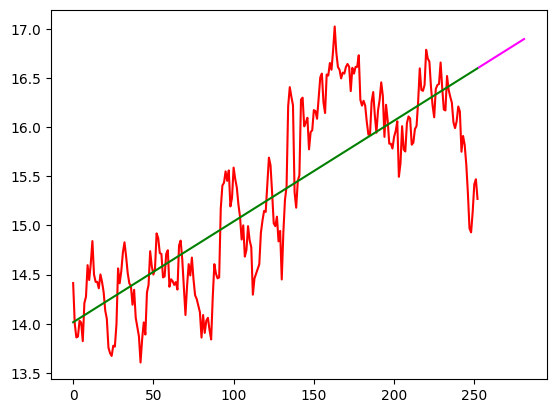

In [24]:
plt.plot(df.index, df['Adj Close'], color="red") # Original data values
plt.plot(df.index, y_pred, color="green") # Linear regression line
plt.plot(range(253,282), month_out, color="magenta") #Predicted values

plt.show()

# Exercise Part 1
Use dataframe to create and plot a linear regression model for the two columns "Logged GDP per capita" and "Ladder score"

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/BriDeWaltCCC/PFDADataSets/main/world-happiness-report-2021.csv')
df.sort_values("Logged GDP per capita", inplace=True)
df.reset_index(drop=True, inplace=True)
display(df)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Burundi,Sub-Saharan Africa,3.775,0.107,3.985,3.565,6.635,0.490,53.400,0.626,-0.024,0.607,2.43,0.000,0.062,0.155,0.298,0.172,0.212,2.876
1,Malawi,Sub-Saharan Africa,3.600,0.092,3.781,3.419,6.958,0.537,57.948,0.780,0.038,0.729,2.43,0.113,0.168,0.298,0.484,0.213,0.134,2.190
2,Niger,Sub-Saharan Africa,5.074,0.102,5.273,4.875,7.098,0.641,53.780,0.806,0.018,0.693,2.43,0.162,0.402,0.167,0.516,0.200,0.157,3.470
3,Mozambique,Sub-Saharan Africa,4.794,0.103,4.997,4.592,7.158,0.744,54.706,0.882,0.061,0.684,2.43,0.183,0.634,0.196,0.608,0.228,0.163,2.783
4,Liberia,Sub-Saharan Africa,4.625,0.106,4.833,4.417,7.288,0.720,56.498,0.735,0.050,0.850,2.43,0.228,0.580,0.253,0.430,0.221,0.057,2.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,United Arab Emirates,Middle East and North Africa,6.561,0.039,6.637,6.484,11.085,0.844,67.333,0.932,0.074,0.589,2.43,1.555,0.860,0.594,0.670,0.236,0.223,2.422
145,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
146,Ireland,Western Europe,7.085,0.040,7.164,7.006,11.342,0.947,72.400,0.879,0.077,0.363,2.43,1.644,1.092,0.753,0.606,0.238,0.367,2.384
147,Singapore,Southeast Asia,6.377,0.043,6.460,6.293,11.488,0.915,76.953,0.927,-0.018,0.082,2.43,1.695,1.019,0.897,0.664,0.176,0.547,1.379


In [61]:
model = LinearRegression()
model.fit(df[["Logged GDP per capita"]], df["Ladder score"])
y_pred = model.predict(df[["Logged GDP per capita"]])

# Predict what the Ladder Score will be if the Logged GDP per capita reaches 15
x_max = df["Logged GDP per capita"].max()
predicted_GDP = np.linspace(x_max, 15, 20).reshape(-1, 1) # Create 20 GDP values between our current maximum and 15
predicted_ladder = model.predict(predicted_GDP)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


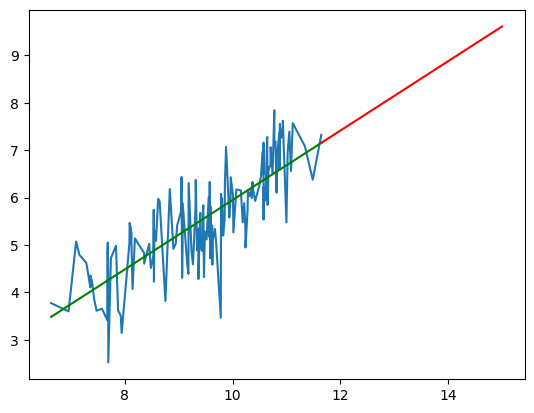

In [62]:
plt.plot(df["Logged GDP per capita"], df["Ladder score"])
plt.plot(df["Logged GDP per capita"], y_pred, color="green") # Linear regression line
plt.plot(predicted_GDP, predicted_ladder, color="red")

plt.show()